In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [34]:
def integrateLegendre(func,npts,a, b, *args, **kwargs):
    
    # general purpose legendre integrator
    x = np.linspace(-1, 1, npts)
    m = (b-a)/2
    c = (b+a)/2
    Y = func(m*x+c, *args, **kwargs)
    P = np.polynomial.legendre.legvander(x,npts-1)
    Pinv = np.linalg.pinv(P)
    coeff = Pinv@Y
#     print(coeff.shape)
    integral = 2*coeff[0]
    integral = integral * (b-a)/2
    
    return integral, coeff

In [109]:
func = np.exp
a = -5
b = 5
y_exp, coeff = integrateLegendre(func,51, a, b)
y_true = np.exp(b)-np.exp(a)
print(f"Absolute error in integration is {np.abs(y_exp-y_true):5.2e}")

Absolute error in integration is 5.46e-03


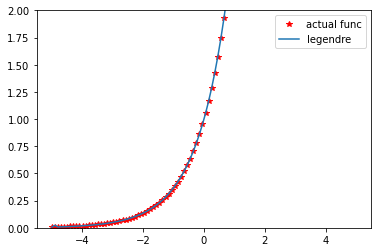

In [110]:
x = np.linspace(-1,1,100)
xnew = np.linspace(-5,5,100)
yleg = np.polynomial.legendre.legval(x, coeff)
plt.ylim([0,2])
plt.plot(xnew, func(xnew),'r*', label='actual func')
plt.plot(5*x,yleg, label='legendre')
plt.legend()

In [8]:
func = np.sin
y_exp = integrateLegendre(func, 11, 0, 2*np.pi)
y_true = 0
print(f"Absolute error in integration is {np.abs(y_exp-y_true):5.2e}")

Absolute error in integration is 1.96e-16


In [113]:
func = lambda x: 1/(1+x**2)
y_exp, coeff = integrateLegendre(func, 19, -1, 1)
y_true = np.arctan(1)-np.arctan(-1)
print(f"Absolute error in integration is {np.abs(y_exp-y_true):5.2e}")

Absolute error in integration is 1.67e-06


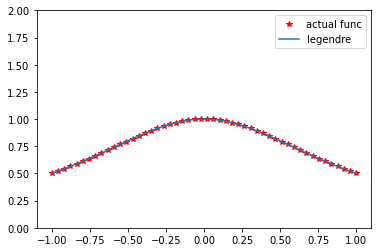

In [114]:
x = np.linspace(-1,1,150)
xnew = np.linspace(-1,1,50)
yleg = np.polynomial.legendre.legval(x, coeff)
plt.ylim([0,2])
plt.plot(xnew, func(xnew),'r*', label='actual func')
plt.plot(1*x,yleg, label='legendre')
plt.legend()

In [52]:
R = 2
z = np.linspace(1,3,900)
z = np.sort(np.append(z,2))
# y_exp = integrateLegendre(myfunc, 5, 0, np.pi)

E_vals = [integrateLegendre(myfunc, 51, 0, np.pi, z_i, R) for z_i in z]


/home/mohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'Electric field')

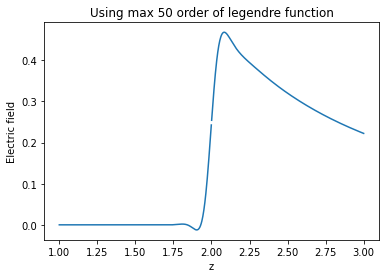

In [53]:
plt.plot(z, E_vals)
plt.title("Using max 50 order of legendre function")
plt.xlabel("z")
plt.ylabel("Electric field")

In [29]:
R = 2
z = np.linspace(1,3,900)
z = np.sort(np.append(z,2))

# y_exp = integrateLegendre(myfunc, 5, 0, np.pi)

E_vals = [quad(myfunc,0, np.pi, args=(z_i, R))[0] for z_i in z]

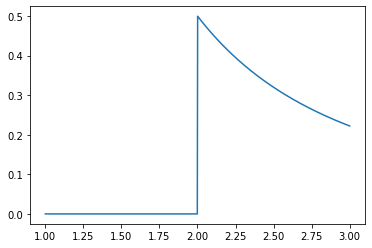

In [30]:
plt.plot(z, E_vals)